## Ансамблевые методы

В данном упражнении вам предстоит решить уже знакомую задачу классификации изображений – отделить изображения кошек от изображений собак, используя ансамбль моделей на основе стекинга.

В [предложенном архиве](https://drive.google.com/open?id=1HLJErnl0u_yiyrXykyq279DVuYMlQldW) находится выборка, включающая в себя изображения кошек и собак (по 500 изображений). Имя каждого изображения, для удобства, имеет следующий формат: `cat/dog.номер_изображения.jpg` в зависимости от того, какое животное присутствует на изображении. Данная выборка используется для **обучения** классификатора и его **оценки**.

[Следующая выборка](https://courses.openedu.ru/assets/courseware/v1/c8f3e99cf88c0643abc7ab918beded9c/asset-v1:ITMOUniversity+ADVMLAUTXT+spring_2023_ITMO_mag+type@asset+block/test_task.zip) предназначена для классификации новых объектов после построения классификатора.

Для работы с изображениями и получения их [гистограмм](https://ru.wikipedia.org/wiki/Гистограмма_(фотография)) — характеристик распределения интенсивности изображения, следует воспользоваться следующей функцией и библиотекой `cv2`:

```python
import cv2

def extract_histogram(image, bins=(8, 8, 8)):
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()
```

Для чтения изображений также воспользуйтесь библиотекой `cv2`: `cv2.imread()`

При считывании набора данных (картинок) из папки для построения гистограммы отсортируйте названия по алфавиту, например, так (иначе тренировочные наборы данных могут отличаться даже при фиксированном random_seed):

```python
imagePaths = sorted(list(paths.list_images('path')))
```

Котов закодируйте нулями, а собак — единицей.

В задачах используйте реализацию алгоритмов из библиотеки sklearn:

```python
from sklearn.svm import LinearSVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import StackingClassifier
```

## Задание

Обучите базовые алгоритмы на исходном наборе данных (предварительно закодируйте классы: Cat — 1, Dog — 0):

In [1]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [2]:
!ls

drive  sample_data


In [3]:
from imutils import paths
import cv2
import matplotlib.pyplot as plt

project_folder = '/content/drive/MyDrive/ITMO/adv-ml/tasks/task_2_svm/'

train_imgs_paths = sorted(list(paths.list_images(project_folder + 'train_task/train')))
train_imgs = [cv2.imread(path) for path in train_imgs_paths]

In [4]:
test_imgs_paths = sorted(list(paths.list_images(project_folder + 'test_task/test')))
test_imgs = [cv2.imread(path) for path in test_imgs_paths]

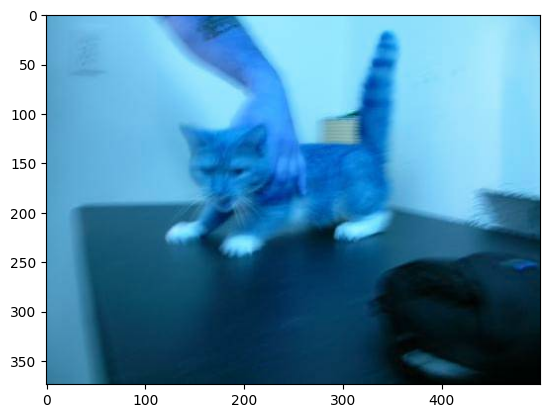

In [9]:
plt.imshow(train_imgs[0])

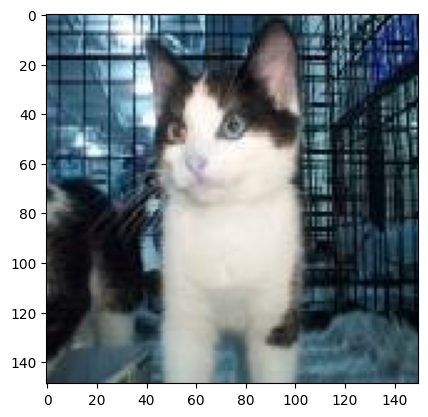

In [6]:
plt.imshow(test_imgs[0])

In [7]:
def extract_histogram(image, bins=(8, 8, 8)):
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

In [10]:
import pandas as pd

df_train = pd.DataFrame(data=[extract_histogram(img) for img in train_imgs])
df_train["class"] = [1 if i < 500 else 0 for i in range(1000)]
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,class
0,0.242645,0.073122,0.000232,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.087363,...,0.000000,0.0,0.000000,0.0000,0.00000,0.000000,0.000000,0.000000,0.000000,1
1,0.418818,0.126781,0.000085,0.000000,0.000000,0.0,0.0,0.0,0.005085,0.076441,...,0.000000,0.0,0.000000,0.0000,0.00000,0.000000,0.000000,0.000042,0.000000,1
2,0.356737,0.184168,0.020616,0.001619,0.000717,0.0,0.0,0.0,0.000041,0.027440,...,0.000000,0.0,0.000000,0.0000,0.00000,0.000000,0.000000,0.000000,0.007726,1
3,0.001266,0.019995,0.011941,0.001583,0.000158,0.0,0.0,0.0,0.000000,0.002145,...,0.002233,0.0,0.000000,0.0000,0.00000,0.000000,0.000000,0.023354,0.497077,1
4,0.000000,0.000105,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000366,...,0.000000,0.0,0.002719,0.7748,0.34338,0.038583,0.114442,0.126833,0.008469,1


In [11]:
df_test = pd.DataFrame(data=[extract_histogram(img) for img in test_imgs])
df_test["class"] = [1 if i < 50 else 0 for i in range(100)]
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,class
0,0.567117,0.194313,0.009939,0.000406,0.0,0.0,0.0,0.0,0.001014,0.261450,...,0.000811,0.0,0.0,0.0,0.0,0.0,0.0,0.154963,0.218247,1
1,0.013429,0.020131,0.021416,0.000176,0.0,0.0,0.0,0.0,0.012976,0.030814,...,0.000076,0.0,0.0,0.0,0.0,0.0,0.0,0.000025,0.000000,1
2,0.305423,0.080943,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003492,0.090926,...,0.001008,0.0,0.0,0.0,0.0,0.0,0.0,0.000258,0.024489,1
3,0.399897,0.002392,0.000000,0.000000,0.0,0.0,0.0,0.0,0.110738,0.052461,...,0.000272,0.0,0.0,0.0,0.0,0.0,0.0,0.010275,0.214028,1
4,0.693011,0.144219,0.003652,0.000306,0.0,0.0,0.0,0.0,0.002686,0.131873,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000024,0.024763,1


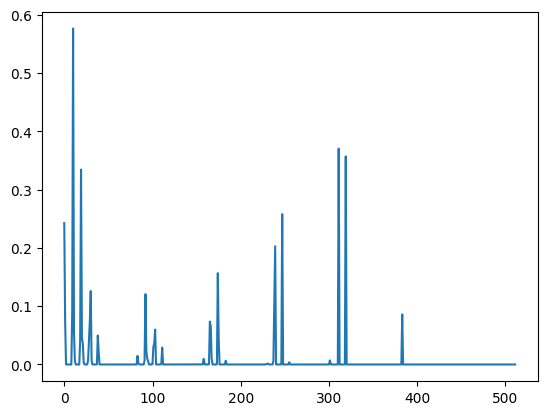

In [12]:
plt.plot(df_train.iloc[0][:-1])

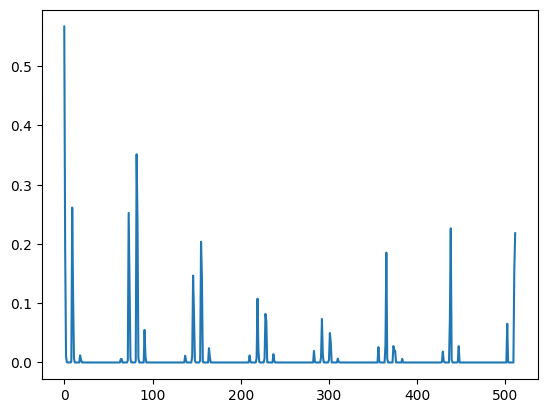

In [13]:
plt.plot(df_test.iloc[0][:-1])

Классификатор с мягким зазором и параметрами: `C=1.21, random_state=242`, остальные параметры по умолчанию.

In [14]:
from sklearn.svm import LinearSVC

svm = LinearSVC(C=1.21, random_state=242)


Бэггинг деревьев принятия решений.

* Параметры дерева: `criterion='entropy', min_samples_leaf=10, max_leaf_nodes=20, random_state=242`, остальные параметры по умолчанию.
* Параметры бэггинга: `n_estimators=19, random_state=242`.

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

decision_tree = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10, max_leaf_nodes=20, random_state=242)
bagging = BaggingClassifier(estimator=decision_tree, n_estimators=19, random_state=242)

Случайный лес с параметрами: `n_estimators=19, criterion='entropy', min_samples_leaf=10, max_leaf_nodes=20, random_state=242`, остальные параметры по умолчанию.

In [19]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=19, criterion='entropy', min_samples_leaf=10, max_leaf_nodes=20, random_state=242)

Инициализируйте метаалгоритм (без обучения) — логистическая регрессия: `solver='lbfgs', random_state=242`, остальные параметры по умолчанию.

In [20]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='lbfgs', random_state=242)

Обучите модель стэкинга. Используйте 2-fold (cv = 2) кросс-валидацию. Обучение стекинга будет выглядить так:

```python
base_estimators = [('SVM', svm), ('Bagging DT', bagging), ('DecisionForest', random_forest)]
sclf = StackingClassifier(estimators=base_estimators, final_estimator=log_reg, cv=2)
```

In [21]:
from sklearn.ensemble import StackingClassifier

base_estimators = [('SVM', svm), ('Bagging DT', bagging), ('DecisionForest', random_forest)]
sclf = StackingClassifier(estimators=base_estimators, final_estimator=log_reg, cv=2)

Введите долю правильной классификации (Accuracy) на тренировочных данных:

In [23]:
X_train = df_train.drop(columns='class')
y_train = df_train['class']

sclf.fit(X_train, y_train).score(X_train, y_train)

0.852

In [24]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, sclf.predict(X_train))

0.852

Выполните предсказание для изображений, указанных ниже
* cat.1025.jpg
* dog.1013.jpg
* dog.1030.jpg
* dog.1041.jpg

Определите вероятность отнесения изображений к классу 1 с помощью обученного метаалгоритма. Ответы округлите до тысячных.

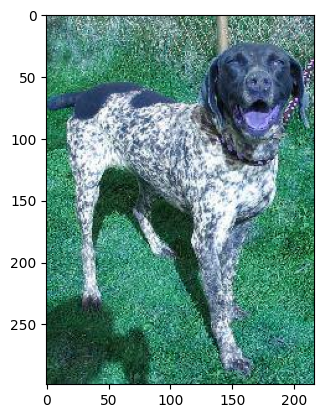

In [27]:
plt.imshow(test_imgs[63])

In [34]:
probs = [round(prob[1], 3) for prob in sclf.predict_proba(df_test.iloc[[25, 63, 80, 91]].drop(columns=['class']))]

In [35]:
probs

[0.681, 0.101, 0.366, 0.363]

In [36]:
drive.flush_and_unmount()